In [284]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

In [285]:
def sensor_histogram(data):
    x_data_list = []
    y_data_list = []
    for i,column in enumerate(data):
        y_data = list(data[column].values)
        y_data_list += y_data
        x_data_list += [i]*len(y_data)
    return x_data_list, y_data_list

In [287]:
df_sds = pd.read_csv('tmp/phi_meansds.csv')

In [288]:
df_centers = pd.read_csv('tmp/phi_meancenters.csv')

In [289]:
df_k = pd.read_csv('tmp/phi_meank.csv')
df_m = pd.read_csv('tmp/phi_meanm.csv')

In [290]:
df_centers.values

array([[ 11.01896459],
       [ 10.53573671],
       [ 10.54727024],
       ..., 
       [ 11.31347894],
       [  9.5112477 ],
       [ 11.24112852]])

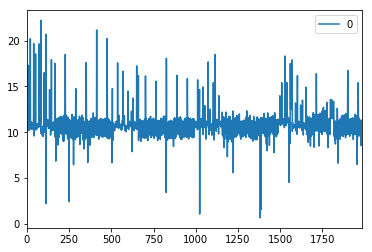

In [291]:
df_centers.plot()

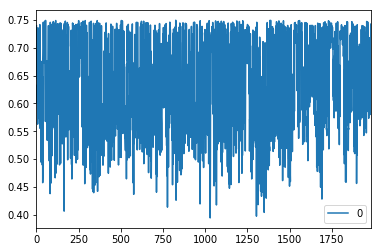

In [292]:
df_sds.plot()

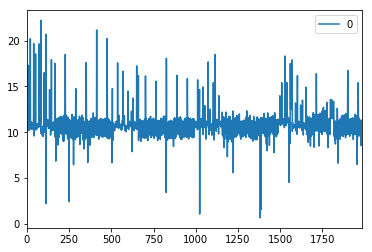

In [293]:
df_centers.plot()

In [294]:
import sys
sys.path.append('../src')
from processing import create_basic_dataset, read_dataset
from processing import create_negative, create_positive, create_x_feature
from processing import BADCALS

In [296]:
dataset = read_dataset()
basic = create_basic_dataset(dataset, 'phi', BADCALS)
basic = create_x_feature(basic, BADCALS)
negative = create_negative(basic, BADCALS)
xfactor = negative['x']
del negative['x']
positive = create_positive(basic, BADCALS)
#positive = positive.iloc[:,9:]
#negative = negative.iloc[:,9:]

In [297]:
negative[xfactor == 10].datetime.unique()

array(['2012-07-30T00:00:00.000000000', '2012-08-01T00:00:00.000000000'], dtype='datetime64[ns]')

In [298]:
negative[xfactor == 3].datetime.unique()

array(['2012-08-02T00:00:00.000000000'], dtype='datetime64[ns]')

In [299]:
negative_selected_date = negative.datetime.unique()[-1]

In [300]:
positive_selected_date = positive.datetime.unique()[-4]

In [301]:
selected_positive = positive[positive.datetime==positive_selected_date]

In [302]:
positive_selected_date

numpy.datetime64('2016-11-11T00:00:00.000000000')

In [303]:
negative_selected_date

numpy.datetime64('2012-08-02T00:00:00.000000000')

In [304]:
selected_negative = negative[negative.datetime==negative_selected_date]

In [305]:
import pymc3 as pm

In [306]:
trace

<MultiTrace: 1 chains, 8000 iterations, 2 variables>

In [ ]:
def get_x(inp):
    settings={
        'draws': 800,
        'tune': 200,
    }
    with pm.Model() as model:
        x = pm.Uniform('x', 0,20)
        observations = pm.Normal("obs", mu=df_centers.values.T[0]+df_k.values.T[0]*x, sd=df_sds.values.T[0]+df_m.values.T[0]*x, observed=inp)
        step = pm.Metropolis(vars=[x])
        trace = pm.sample(**settings, step=step, njobs=1, chains=1)
    return trace

In [265]:
tdata = selected_negative.iloc[1:6,9:]

In [266]:
tdata.head()

channel1  channel2  channel3  channel4  channel5  channel6  channel7  \
134      12.0      11.0      11.0      12.0      11.0      11.0      11.0   
224      12.0      11.0      11.0      11.0      11.0      11.0      11.0   
314      11.0      11.0      11.0      12.0      11.0      12.0      11.0   
404      11.0      11.0      11.0      12.0      12.0      11.0      12.0   
494      11.0      11.0      11.0      11.0      11.0      11.0      11.0   

     channel8  channel9  channel10     ...       channel2038  channel2039  \
134      11.0       7.0       11.0     ...              12.0         13.0   
224      11.0      11.0       11.0     ...              15.0         15.0   
314      11.0      11.0       12.0     ...              16.0         16.0   
404      12.0      11.0       11.0     ...              15.0         15.0   
494      11.0      11.0       11.0     ...              15.0         14.0   

     channel2040  channel2041  channel2042  channel2043  channel2044  \
134         13.0         13.0         13.0         13.0         13.0   
224         15.0         15.0         15.0         15.0         15.0   
314         16.0         16.0         16.0         16.0         16.0   
404         15.0         15.0         15.0         16.0         16.0   
494         14.0         14.0         15.0         15.0         15.0   

     channel2045  channel2046  channel2047  
134         13.0         13.0         13.0  
224         15.0         15.0         18.0  
314         16.0         16.0         19.0  
404         15.0         16.0         18.0  
494         15.0         14.0         16.0  

[5 rows x 1984 columns]

In [267]:
traces = {}
for i,row in tdata.iterrows():
    traces[i]=(get_x(tdata))

Sequential sampling (1 chains in 1 job)
INFO:pymc3:Sequential sampling (1 chains in 1 job)
Metropolis: [x_interval__]
INFO:pymc3:Metropolis: [x_interval__]
100%|██████████| 10000/10000 [00:05<00:00, 1895.53it/s]
Only one chain was sampled, this makes it impossible to run some convergence checks
INFO:pymc3:Only one chain was sampled, this makes it impossible to run some convergence checks
Sequential sampling (1 chains in 1 job)
INFO:pymc3:Sequential sampling (1 chains in 1 job)
Metropolis: [x_interval__]
INFO:pymc3:Metropolis: [x_interval__]
100%|██████████| 10000/10000 [00:05<00:00, 1886.46it/s]
Only one chain was sampled, this makes it impossible to run some convergence checks
INFO:pymc3:Only one chain was sampled, this makes it impossible to run some convergence checks
Sequential sampling (1 chains in 1 job)
INFO:pymc3:Sequential sampling (1 chains in 1 job)
Metropolis: [x_interval__]
INFO:pymc3:Metropolis: [x_interval__]
100%|██████████| 10000/10000 [00:05<00:00, 1845.87it/s]
Only o

In [273]:
traces[134]['x']

array([ 2.21147934,  2.23302535,  2.22273279, ...,  2.23372971,
        2.23372971,  2.23372971])

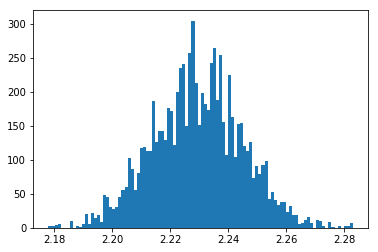

In [283]:
for i in traces:
    plt.hist(traces[i]['x'].ravel(),bins=100)
    break

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x2ba2ae54b588>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x2ba2b4338d68>]], dtype=object)

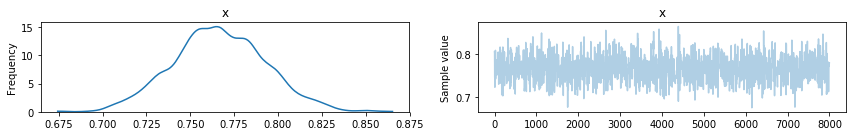

In [259]:
pm.traceplot(trace)

In [217]:
trace['x']

array([ 10.63215065,  10.63215065,  10.63215065, ...,  10.64768567,
        10.64768567,  10.63974407])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x2ba2d577d978>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x2ba2b4456400>]], dtype=object)

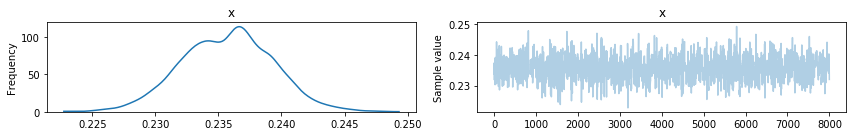

In [227]:
pm.traceplot(trace)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x2ba2b3dd12b0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x2ba2b3fd8fd0>]], dtype=object)

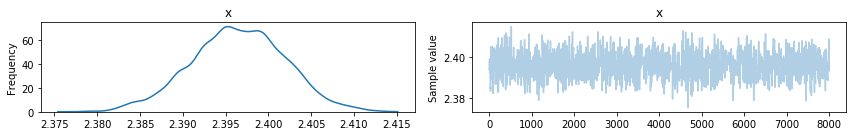

In [249]:
pm.traceplot(trace)

In [228]:
trace['x'].m()
#0

0.23564109040547412

In [252]:
trace['x'].mean()
#3

2.3963829870117443

In [218]:
#10
trace['x'].mean()

10.635835712920308

In [123]:
12/1.69

7.100591715976331

In [132]:
ref = lambda x: (x-14.30)*10/1.69

In [133]:
ref(14.68)

2.2485207100591658

In [ ]:
df_k

In [145]:
testline = (selected_negative.iloc[1,9:] - df_centers.values.T[0])/df_k.values.T[0]

In [160]:
testline.values.

array([186.27892928674891, 774.5408720093194, 1220.5038552595411, ...,
       24.322616202522834, 22.724431297331599, 19.699731096511645], dtype=object)

In [168]:
ltest = list(testline.values.T)

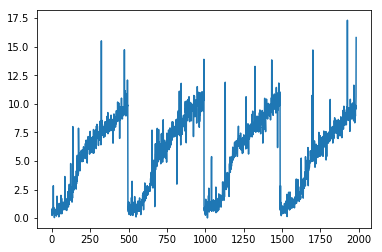

In [176]:
plt.plot(df_centers.values.T[0]+df_k.values.T[0]*10)

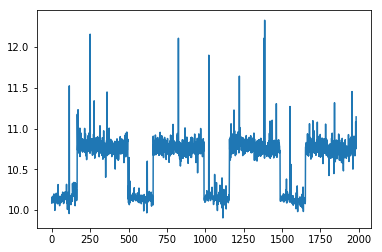

In [180]:
plt.plot(df_centers.values.T[0]+10 )

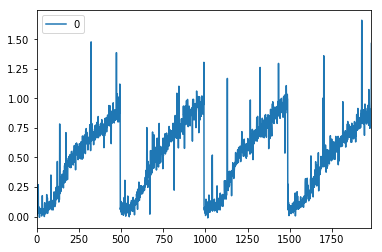

In [174]:
df_k.plot()

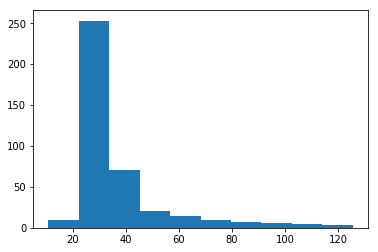

In [172]:
_ = plt.hist(ltest[-400:])

In [40]:
settings={
		'draws': 8000,
		'tune': 2000,
	}

In [44]:
with pm.Model() as model:
    x = 1
    k = df_k.values.T[0]
    m = df_m.values.T[0]
    observations = pm.Normal("obs", mu=df_centers.values.T[0]+k*x, sd=df_sds.values.T[0]+m*x, shape=1984)


In [45]:
with model:
    step = pm.Metropolis(vars=[observations])
    trace = pm.sample(**settings, step=step, njobs=1, chains=1)

Sequential sampling (1 chains in 1 job)
Metropolis: [obs]
100%|██████████| 10000/10000 [00:03<00:00, 2854.80it/s]
Only one chain was sampled, this makes it impossible to run some convergence checks


Text(0,0.5,'ADC')

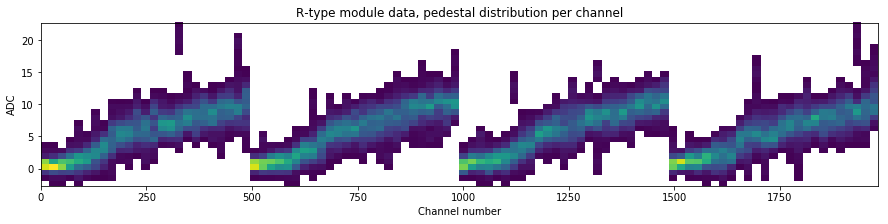

In [43]:
data = pd.DataFrame(trace['obs'])
px, py = sensor_histogram(data)
fig, axe = plt.subplots(1,1,figsize=(15,3))
_ = plt.hist2d(px, py, bins=[100,30],cmin=1)#, range=[[0,100],[0,30]],cmin=1)
axe.set_title('R-type module data, pedestal distribution per channel')
axe.set_xlabel('Channel number')
axe.set_ylabel('ADC')

Text(0,0.5,'ADC')

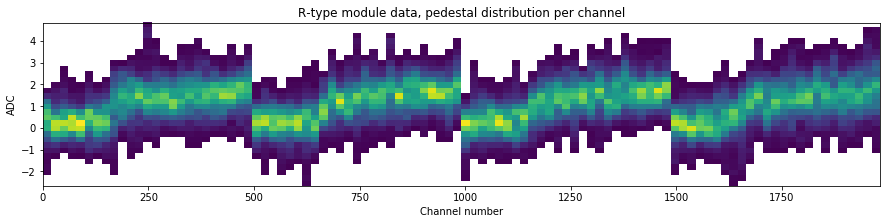

In [46]:
data = pd.DataFrame(trace['obs'])
px, py = sensor_histogram(data)
fig, axe = plt.subplots(1,1,figsize=(15,3))
_ = plt.hist2d(px, py, bins=[100,30],cmin=1)#, range=[[0,100],[0,30]],cmin=1)
axe.set_title('R-type module data, pedestal distribution per channel')
axe.set_xlabel('Channel number')
axe.set_ylabel('ADC')

Text(0,0.5,'ADC')

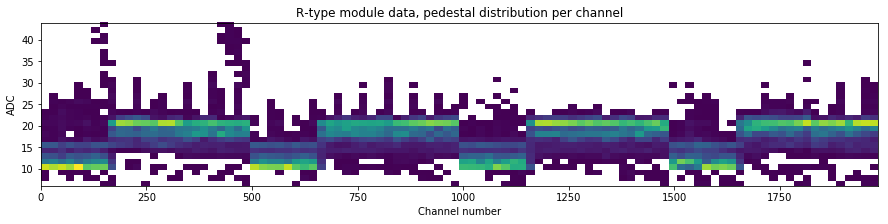

In [328]:
data = pd.DataFrame(selected_negative.iloc[:,9:])
px, py = sensor_histogram(data)
fig, axe = plt.subplots(1,1,figsize=(15,3))
_ = plt.hist2d(px, py, bins=[100,30],cmin=1)#, range=[[0,100],[0,30]],cmin=1)
axe.set_title('R-type module data, pedestal distribution per channel')
axe.set_xlabel('Channel number')
axe.set_ylabel('ADC')

Text(0,0.5,'ADC')

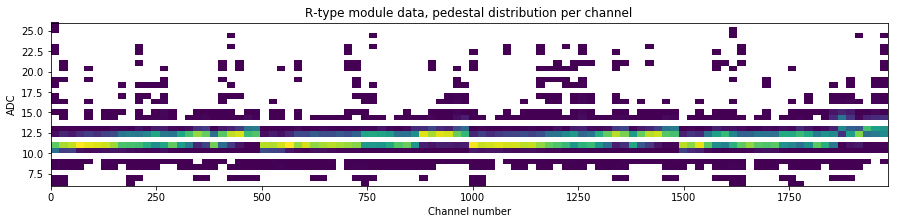

In [178]:
data = pd.DataFrame(positive.iloc[:,9:])
px, py = sensor_histogram(data)
fig, axe = plt.subplots(1,1,figsize=(15,3))
_ = plt.hist2d(px, py, bins=[100,30],cmin=1)#, range=[[0,100],[0,30]],cmin=1)
axe.set_title('R-type module data, pedestal distribution per channel')
axe.set_xlabel('Channel number')
axe.set_ylabel('ADC')